# Set-Up

Installations and imports:

In [1]:
import os
from math import ceil
import pyvista
import matplotlib.pyplot as plt
import sys
import fenics_helpers

Plotting settings:

In [2]:
pyvista.set_plot_theme('document')
mpl_save_dpi = 300

Save settings:

In [3]:
fig_save_dir = './figs'
if not os.path.isdir(fig_save_dir):
    os.mkdir(fig_save_dir)

# Visualise Beam Deformations

Let's first define our fixed parameters (same as those used for training/testing):

In [4]:
fixed_params = {# Parameters found by convergence studies in Notebook [1]:
                'NW': 6,
                'kappa': 3000.00, # in kPa
                # Physical parameters:
                'density': 0.00102, # in g/mm^3
                'g': 9.81, # in m/s^3
               # Beam mesh/geometry parameters:
                'width': 40, # in mm
                'length': 90, # in mm
                'elem_order': 2,
                # Non-linear solver parameters:
                'num_load_steps': 30,
                'rtol': 1e-9, 
                'atol': 1e-9, 
                'max_iter': 50}
fixed_params['elem_size'] =  fixed_params['width']/fixed_params['NW']
fixed_params['NL'] =  ceil(fixed_params['length']/fixed_params['elem_size'])

We can now create our mesh:

In [5]:
mesh = fenics_helpers.create_cuboidal_mesh(*[fixed_params[key] for key in ('length', 'width', 'NL', 'NW')])

Let's now compute the beam deformation for a stiffness of 2 kPa and for angles of 0$^\circ$, 90$^\circ$, and 180$^\circ$:

In [6]:
C_1 = 2.0
beam_angles = [0, 90, 180]
results = []
for i, angle in enumerate(beam_angles):
    print(f'Now simulating beam angle {i+1}/{len(beam_angles)}')
    u = fenics_helpers.simulate_neohookean_beam(mesh, C_1=C_1, beam_angle=angle, **fixed_params)
    results.append(u)

Now simulating beam angle 1/3
Performing load step 1/30...
Performing load step 2/30...
Performing load step 3/30...
Performing load step 4/30...
Performing load step 5/30...
Performing load step 6/30...
Performing load step 7/30...
Performing load step 8/30...
Performing load step 9/30...
Performing load step 10/30...
Performing load step 11/30...
Performing load step 12/30...
Performing load step 13/30...
Performing load step 14/30...
Performing load step 15/30...
Performing load step 16/30...
Performing load step 17/30...
Performing load step 18/30...
Performing load step 19/30...
Performing load step 20/30...
Performing load step 21/30...
Performing load step 22/30...
Performing load step 23/30...
Performing load step 24/30...
Performing load step 25/30...
Performing load step 26/30...
Performing load step 27/30...
Performing load step 28/30...
Performing load step 29/30...
Performing load step 30/30...
Now simulating beam angle 2/3
Performing load step 1/30...
Performing load step

Now let's visualise each of these deformations:


Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(



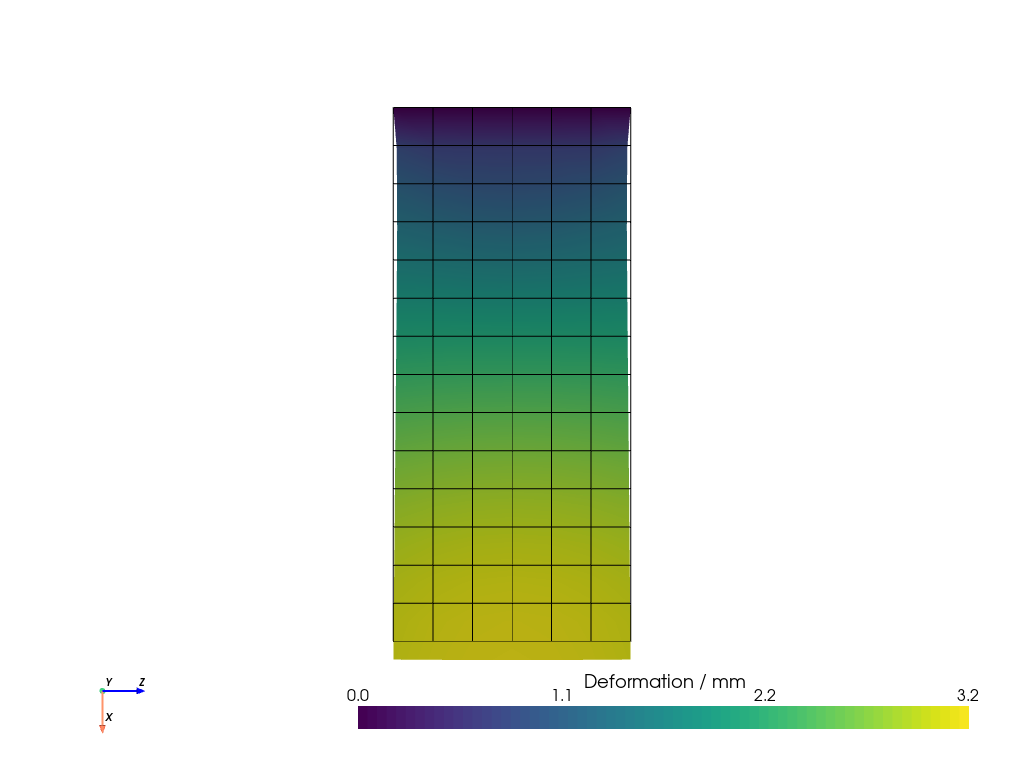

In [7]:
# 0 degress (pure extension) - increase deformation field by 10x so more easily seen:
p = fenics_helpers.plot_deformation(results[0], mesh, beam_angles[0], zoom=0.8, n_labels=4, label_decimals=1)
p.show()
plt.imsave(os.path.join(fig_save_dir, 'beam_0deg.png'), p.image)

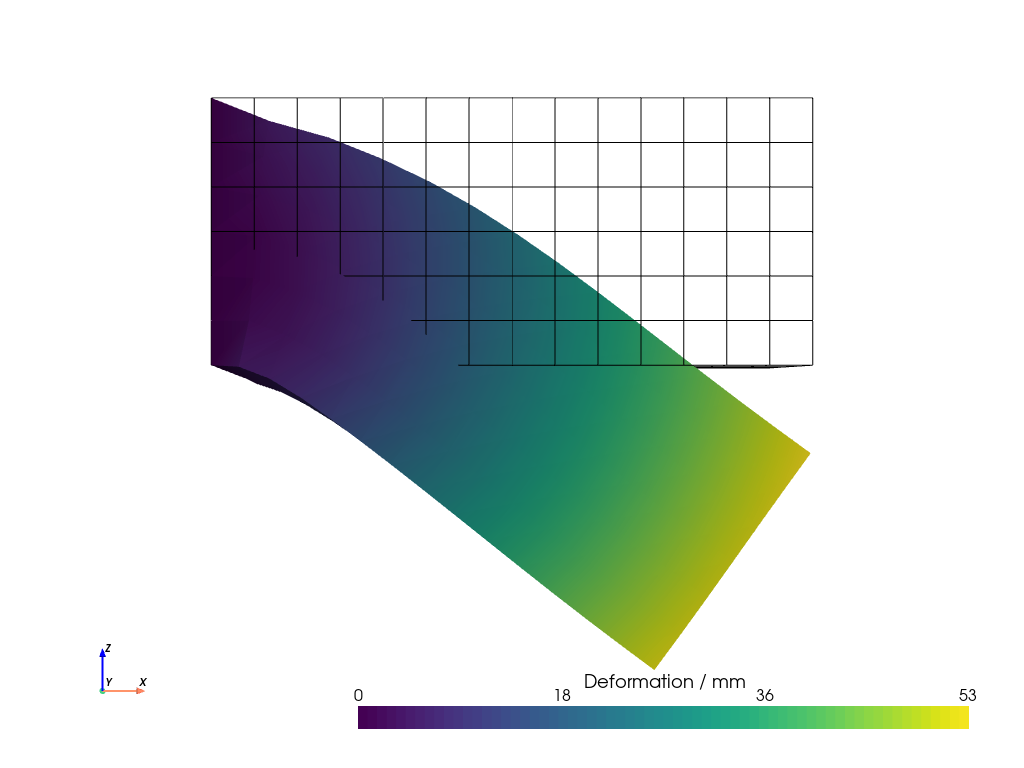

In [8]:
# 90 degress (bending):
p = fenics_helpers.plot_deformation(results[1], mesh, beam_angles[1], zoom=1.1, n_labels=4)
p.show()
plt.imsave(os.path.join(fig_save_dir, 'beam_90deg.png'), p.image)

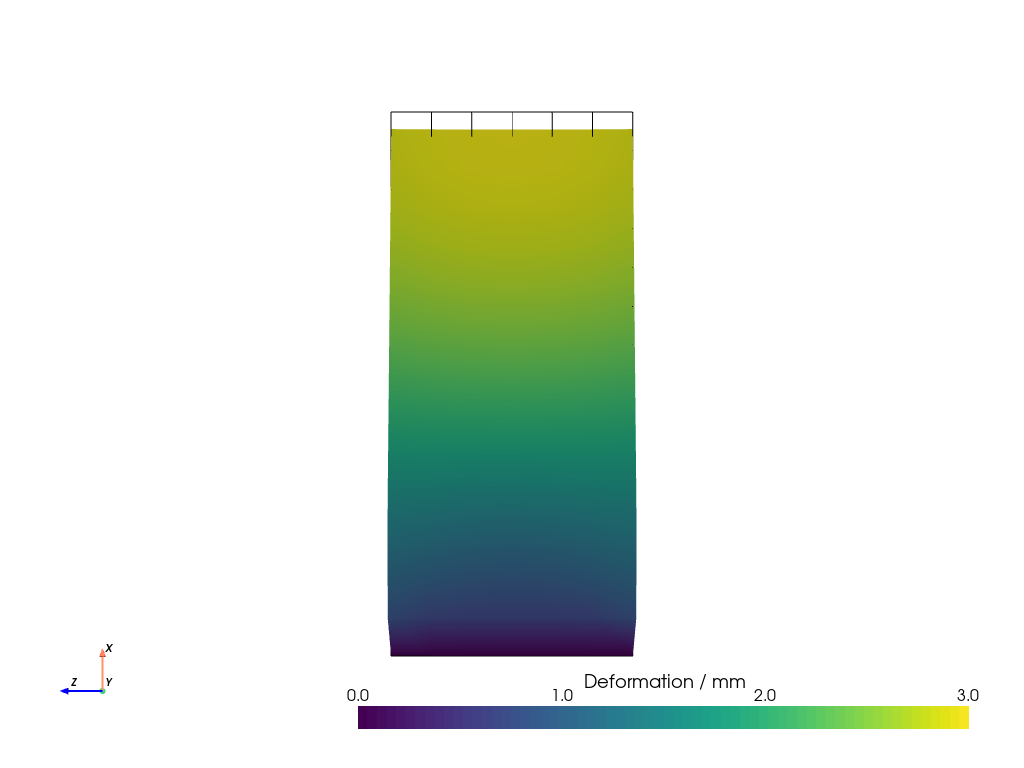

In [9]:
# 180 degress (pure compression) - increase deformation field by 10x so more easily seen:
p = fenics_helpers.plot_deformation(results[2], mesh, beam_angles[2], zoom=0.8, n_labels=4, label_decimals=1)
p.show()
plt.imsave(os.path.join(fig_save_dir, 'beam_180deg.png'), p.image)